In [1]:
%matplotlib inline

Code credit to: https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html


# Comparing edge-based and region-based segmentation

In this example, we will see how to segment objects from a background. We use
the ``coins`` image from ``skimage.data``, which shows several coins outlined
against a darker background.


Text(0.5, 1.0, 'histogram of gray values')

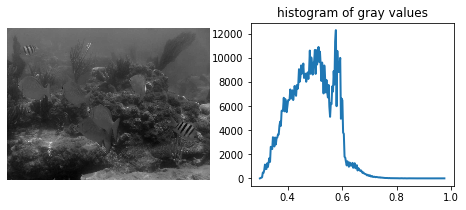

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage.exposure import histogram

coins = io.imread('01.png', as_gray=True)
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

## Region-based segmentation

We therefore try a region-based method using the watershed transform.
First, we find an elevation map using the Sobel gradient of the image.



(-0.5, 1023.5, 767.5, -0.5)

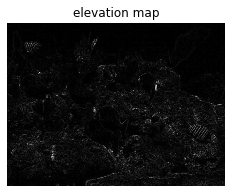

In [84]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

Next we find markers of the background and the coins based on the extreme
parts of the histogram of gray values.

(-0.5, 1023.5, 767.5, -0.5)

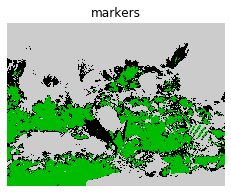

In [88]:
markers = np.zeros_like(coins)

# markers[coins < 80.0/255] = 1
# markers[coins > 90.0/255] = 2

markers[coins < 110.0/255] = 1
markers[coins > 120.0/255] = 2

# markers[coins < 170.0/255] = 2
# markers[coins > 200.0/255] = 1

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

Finally, we use the watershed transform to fill regions of the elevation
map starting from the markers determined above:



(-0.5, 1023.5, 767.5, -0.5)

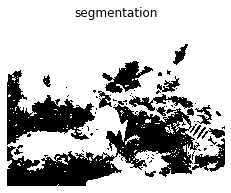

In [94]:
from skimage import segmentation

segmentation_coins = segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_coins, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

This last method works even better, and the coins can be segmented and
labeled individually.



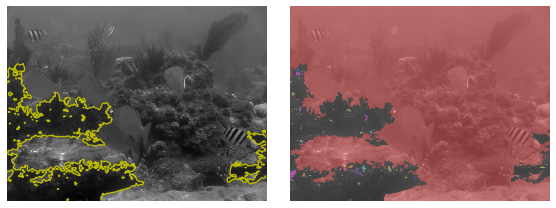

In [95]:
from skimage.color import label2rgb

segmentation_coins = ndi.binary_fill_holes(segmentation_coins - 1)
labeled_coins, _ = ndi.label(segmentation_coins)
image_label_overlay = label2rgb(labeled_coins, image=coins, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].contour(segmentation_coins, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()